In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pyarrow.parquet as pq
import pandas as pd
from lightcurve_interface_skeleton import load_lightcurve_records
import os
from scipy import signal, stats
from rich import print
from sklearn.cluster import DBSCAN

In [3]:
header_data = pd.read_csv('../ref/mislike_image_header_table.csv')

In [4]:
data = pd.read_csv('brightstar_stats.csv',index_col=False)
data.keys()

Index(['mad', 'start_cps', 'end_cps', 'min_cps', 'max_cps', 'mean_std',
       'ad_statistic', 'ad_critical_val_10', 'ad_critical_val_05',
       'ad_critical_val_01', 'xcenter', 'ycenter', 'is_spiky', 'obj_id',
       'eclipse', 'CRPIX1', 'CRPIX2'],
      dtype='object')

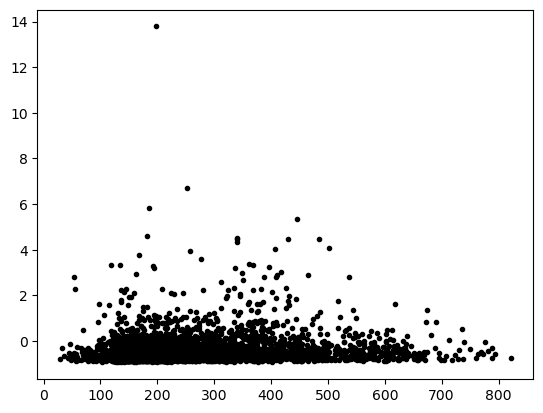

In [5]:
plt.plot(data['start_cps'],data['ad_statistic']-data['ad_critical_val_01'],'k.')

In [6]:
print(len(np.where(data['ad_critical_val_01']<data['ad_statistic'])[0]),'of',len(data),'are variable by AD at 1%')
print(len(np.where(data['ad_critical_val_05']<data['ad_statistic'])[0]),'of',len(data),'are variable by AD at 5%')
print(len(np.where(data['ad_critical_val_10']<data['ad_statistic'])[0]),'of',len(data),'are variable by AD at 10%')

510 of 5456 are variable by AD at 1%

1015 of 5456 are variable by AD at 5%

1411 of 5456 are variable by AD at 10%

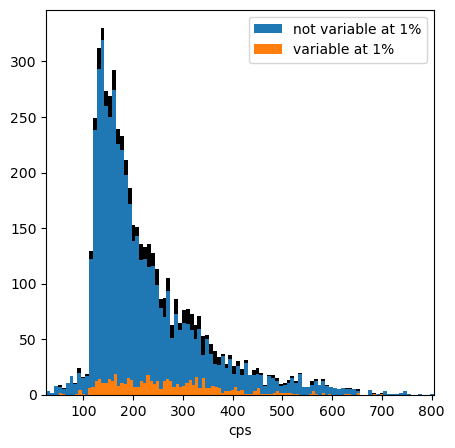

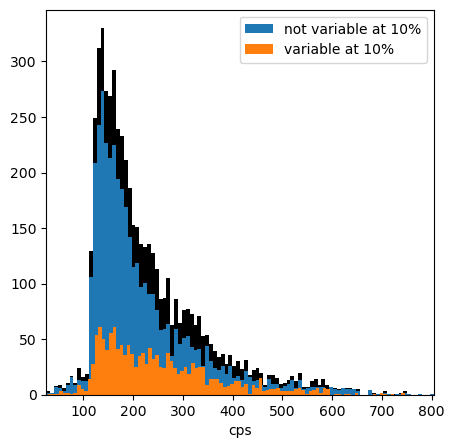

In [18]:
plt.figure(figsize=(5,5));
plt.hist(data['min_cps'],bins=100,color='k');
ix = np.where(np.array(data['ad_statistic'])<np.array(data['ad_critical_val_01']))
plt.hist(data['min_cps'].loc[ix],bins=100,label='not variable at 1%');
ix = np.where(np.array(data['ad_statistic'])>=np.array(data['ad_critical_val_01']))
plt.hist(data['min_cps'].loc[ix],bins=100,label='variable at 1%');
plt.xlabel('cps');
plt.legend()
plt.xlim([min(data['min_cps']),max(data['min_cps'])]);

plt.figure(figsize=(5,5));
plt.hist(data['min_cps'],bins=100,color='k');
ix = np.where(np.array(data['ad_statistic'])<np.array(data['ad_critical_val_10']))
plt.hist(data['min_cps'].loc[ix],bins=100,label='not variable at 10%');
ix = np.where(np.array(data['ad_statistic'])>=np.array(data['ad_critical_val_10']))
plt.hist(data['min_cps'].loc[ix],bins=100,label='variable at 10%');
plt.xlabel('cps');
plt.legend()
plt.xlim([min(data['min_cps']),max(data['min_cps'])]);


Text(0.5, 0, 'cps')

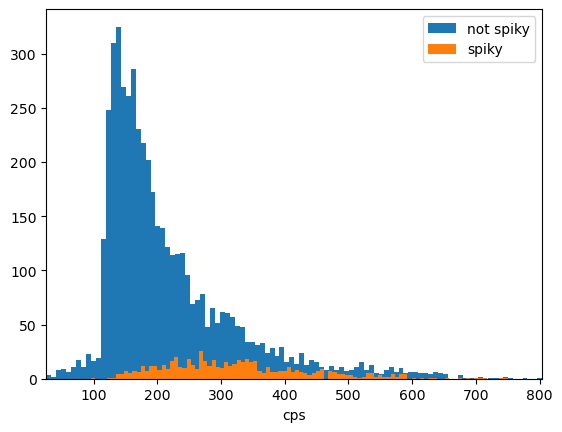

In [19]:
ix = np.where(data['is_spiky']==0)
plt.hist(data['min_cps'].loc[ix],bins=100,label='not spiky');
ix = np.where(data['is_spiky']==1)
plt.hist(data['min_cps'].loc[ix],bins=100,label='spiky');
plt.legend()
plt.xlim([min(data['min_cps']),max(data['min_cps'])])
plt.xlabel('cps')

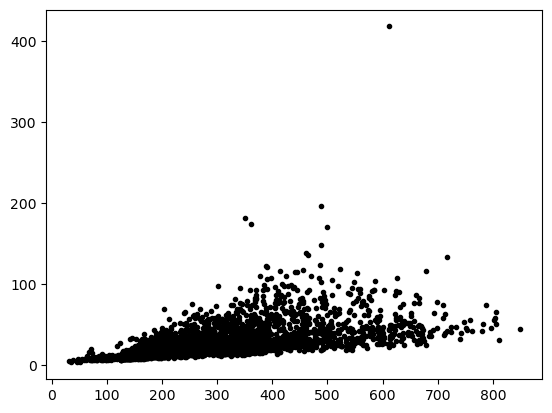

In [9]:
plt.plot(data['max_cps'],data['max_cps']-data['min_cps'],'k.')

In [11]:
data.keys()

Index(['mad', 'start_cps', 'end_cps', 'min_cps', 'max_cps', 'mean_std',
       'ad_statistic', 'ad_critical_val_10', 'ad_critical_val_05',
       'ad_critical_val_01', 'xcenter', 'ycenter', 'is_spiky', 'obj_id',
       'eclipse', 'CRPIX1', 'CRPIX2'],
      dtype='object')

In [12]:
detrad = np.array(np.sqrt((data['xcenter']-data['CRPIX1'])**2+(data['ycenter']-data['CRPIX2'])**2))

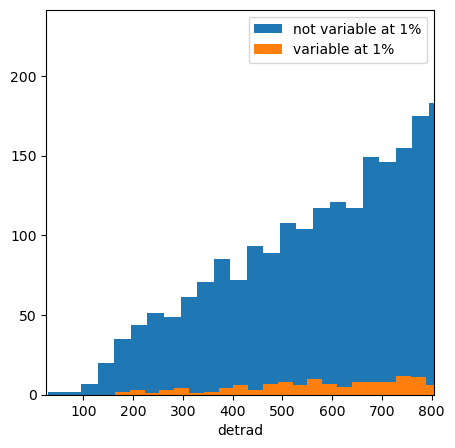

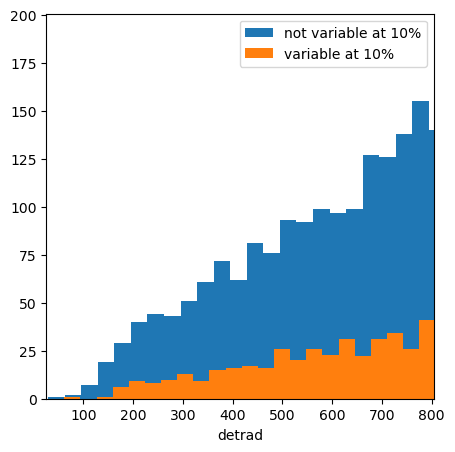

In [13]:
plt.figure(figsize=(5,5));
ix = np.where((np.array(data['ad_statistic'])<np.array(data['ad_critical_val_01'])))
plt.hist(detrad[ix],bins=40,label='not variable at 1%');
ix = np.where((np.array(data['ad_statistic'])>np.array(data['ad_critical_val_01'])))
plt.hist(detrad[ix],bins=40,label='variable at 1%');
plt.legend()
plt.xlabel('detrad')
plt.xlim([min(data['min_cps']),max(data['min_cps'])]);

plt.figure(figsize=(5,5));
ix = np.where((np.array(data['ad_statistic'])<np.array(data['ad_critical_val_10'])))
plt.hist(detrad[ix],bins=40,label='not variable at 10%');
ix = np.where((np.array(data['ad_statistic'])>np.array(data['ad_critical_val_10'])))
plt.hist(detrad[ix],bins=40,label='variable at 10%');
plt.legend()
plt.xlabel('detrad')
plt.xlim([min(data['min_cps']),max(data['min_cps'])]);

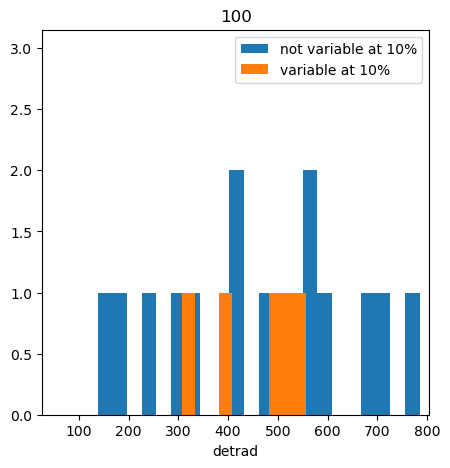

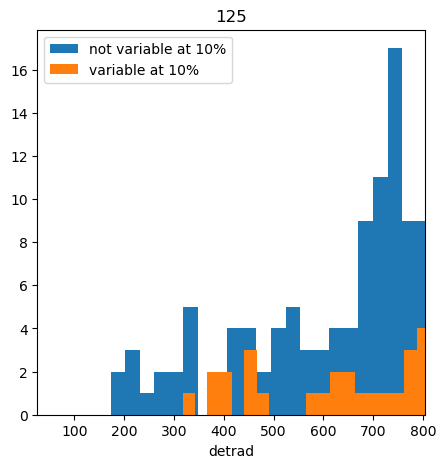

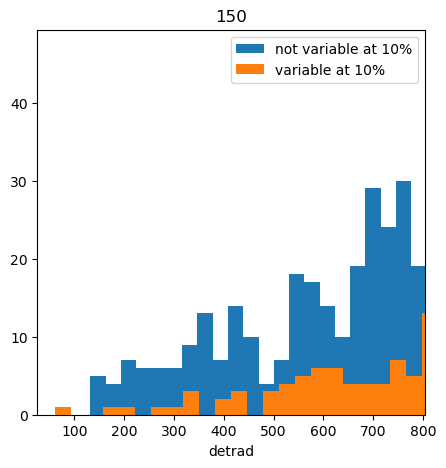

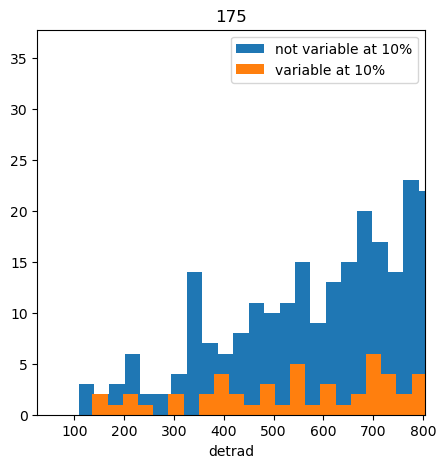

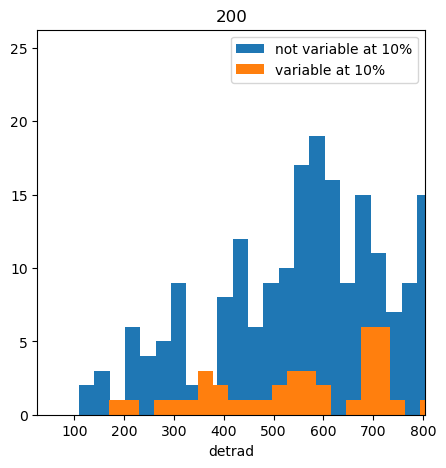

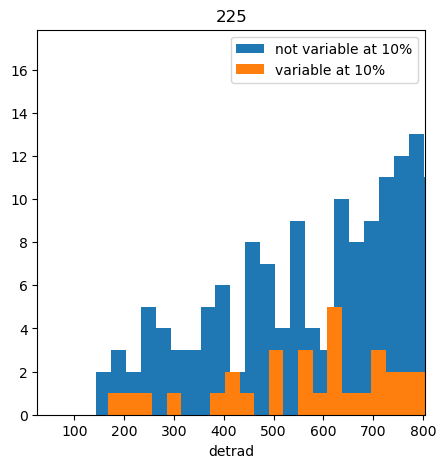

In [14]:
for cpslim in np.arange(100,250,25):
    plt.figure(figsize=(5,5));
    plt.title(cpslim)
    ix = np.where((np.array(data['ad_statistic'])<np.array(data['ad_critical_val_10'])) &
                  (np.array(data['min_cps']>cpslim-25)) &
                  (np.array(data['min_cps']<=cpslim)))
    plt.hist(detrad[ix],bins=40,label='not variable at 10%');
    ix = np.where((np.array(data['ad_statistic'])>np.array(data['ad_critical_val_10'])) &
                  (np.array(data['min_cps']>cpslim-25)) &
                  (np.array(data['min_cps']<=cpslim)))
    plt.hist(detrad[ix],bins=40,label='variable at 10%');
    plt.legend()
    plt.xlabel('detrad')
    plt.xlim([min(data['min_cps']),max(data['min_cps'])]);